# Python Best Practices Workshop

This notebook shows the definition of some functions related to reading and analyzing an molecular XYZ file. 

For the Best Practices workshop, the idea would be to send them this notebook, then work to put these into a package. This would cover some topics not currently covered in the workshop related to code structure (how to group things into modules) and relative imports in packages. 

I think this is reflective of what many students will do after the workshop. They probably already have existing functions and will be putting them into packages after attending.

We could even make the functions 'worse' - giving them bad variable names and spacing to demonstrate how much easier and more readable things are when you follow PEP8 convention. This would be difficult because we want them to understand what's going on with the functions. We are already not giving them DocStrings to start.

I've included two optional functions for homework. We would give them the function name and docstring for that, and a challenge would be to implement the function and have testing for it.

I've outlined functions for 
    - File IO 
        - open_xyz
        - write_xyz
    - measurement
        - calculate_distance
        - calculate_angle
    - properties
        - build_bond_list
        - calculate_molecular_mass (homework function)
        - calculate_center_of_mass (homework function)
    - visualize
        - draw_molecule
        - bond_histogram
        
If we feel this is too many functions, I suppose we could take out the vizualize module (and then we also would not need the atom_colors dictionary). I also think it's pretty cool and people tend to like visualizations.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

# These two dictionaries would go in some sort of data module.
atomic_weights = {
    'H': 1.00784,
    'C': 12.0107,
    'N': 14.0067,
    'O': 15.999,
    'P': 30.973762,
    'F': 18.998403,
    'Cl': 35.453,
    'Br': 79.904,
}

atom_colors = {
    'H': 'white',
    'C': '#D3D3D3',
    'N': '#add8e6',
    'O': 'red',
    'P': '#FFA500',
    'F': '#FFFFE0',
    'Cl': '#98FB98',
    'Br': '#F4A460',
    'S': 'yellow'
}

def open_pdb(file_location):
    with open(file_location) as f:
        data = f.readlines()
    
    coordinates = []
    symbols = []
    
    for line in data:
        if 'ATOM' in line[0:6] or 'HETATM' in line[0:6]:
            symbols.append(line[76:79].strip())
            
            coords = [float(x) for x in line[30:55].split()]
            coordinates.append(coords)
        
        coords = np.array(coordinates)

    return symbols, coords
    

# These two functions go in a file io module
def open_xyz(file_location):
    
    # Open an xyz file and return symbols and coordinates.
    xyz_file = np.genfromtxt(fname=file_location, skip_header=2, dtype='unicode')
    symbols = xyz_file[:,0]
    coords = (xyz_file[:,1:])
    coords = coords.astype(np.float)
    return symbols, coords

def write_xyz(file_location, symbols, coordinates):
    
    num_atoms = len(symbols)
    
    with open(file_location, 'w+') as f:
        f.write('{}\n'.format(num_atoms))
        f.write('XYZ file\n')
        
        for i in range(num_atoms):
            f.write('{}\t{}\t{}\t{}\n'.format(symbols[i], 
                                              coordinates[i,0], coordinates[i,1], coordinates[i,2]))

# These two functions go in a module called measure
def calculate_distance(rA, rB):
    dist_vec = (rA - rB)
    distance = np.linalg.norm(dist_vec)
    return distance

def calculate_angle(rA, rB, rC, degrees=False):
    AB = rB - rA
    BC = rB - rC
    theta=np.arccos(np.dot(AB, BC)/(np.linalg.norm(AB)*np.linalg.norm(BC)))

    if degrees:
        return np.degrees(theta)
    else:
        return theta

# These two functions go in a visualize module.
def draw_molecule(coordinates, symbols, draw_bonds=None, save_location=None, dpi=300):
    
    # Create figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Get colors - based on atom name
    colors = []
    for atom in symbols:
        colors.append(atom_colors[atom])
    
    size = np.array(plt.rcParams['lines.markersize'] ** 2)*200/(len(coordinates))

    ax.scatter(coordinates[:,0], coordinates[:,1], coordinates[:,2], marker="o",
               edgecolors='k', facecolors=colors, alpha=1, s=size)
    
    # Draw bonds
    if draw_bonds:
        for atoms, bond_length in draw_bonds.items():
            atom1 = atoms[0]
            atom2 = atoms[1]
            
            ax.plot(coordinates[[atom1,atom2], 0], coordinates[[atom1,atom2], 1],
                    coordinates[[atom1,atom2], 2], color='k')
            
    plt.axis('square')
    
    # Save figure
    if save_location:
        plt.savefig(save_location, dpi=dpi, graph_min=0, graph_max=2)
    
    return ax

def bond_histogram(bond_list, save_location=None, dpi=300, graph_min=0, graph_max=2):
    
    lengths = []
    for atoms, bond_length in bond_list.items():
        lengths.append(bond_length)
    
    bins = np.linspace(graph_min, graph_max)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    plt.xlabel('Bond Length (angstrom)')
    plt.ylabel('Number of Bonds')
    
    
    ax.hist(lengths, bins=bins)
    
    # Save figure
    if save_location:
        plt.savefig(save_location, dpi=dpi)
    
    return ax
        

# This function (and the ones listed below to ask students to write) could go in a calculate module (better name?)
def build_bond_list(coordinates, max_bond=1.5, min_bond=0):
    
    # Find the bonds in a molecule
    bonds = {}
    num_atoms = len(coordinates)

    for atom1 in range(num_atoms):
        for atom2 in range(atom1, num_atoms):
            distance = calculate_distance(coordinates[atom1], coordinates[atom2])
            if distance > min_bond and distance < max_bond:
                bonds[(atom1, atom2)] = distance

    return bonds

#--------------------------------------------------------------------------------------------------------------
# Functions students write below
#-------------------------------------------------------------------------------------------------------------
# For these functions, we would provide students with the docstrings and function names, and they could write
# functions to fit those specifications.

# Using the atom_weights dictionary, write a function which calculates the mass of a molecule.
def calculate_molecular_mass(symbols):
    """Calculate the mass of a molecule.
    
    Parameters
    ----------
    symbols : list
        A list of elements.
    
    Returns
    -------
    mass : float
        The mass of the molecule
    """

    mass = 0
    for atom in symbols:
        mass += atom_weights[atom]
    
    return mass

# Using the atomic_weights dictionary, write a function which calculates the center of mass of a molecule.
def calculate_center_of_mass(symbols, coordinates):
    """Calculate the center of mass of a molecule.
    
    The center of mass is weighted by each atom's weight.
    
    Parameters
    ----------
    symbols : list
        A list of elements for the molecule
    coordinates : np.ndarray
        The coordinates of the molecule.
    
    Returns
    -------
    center_of_mass: np.ndarray
        The center of mass of the molecule.
    
    Notes
    -----
    The center of mass is calculated with the formula
    
    .. math:: \\vec{R}=\\frac{1}{M} \\sum_{i=1}^{n} m_{i}\\vec{r_{}i}
    
    """
    
    total_mass = calculate_molecular_mass(symbols)
    
    mass_array = np.zeros([len(symbols), 1])
    
    for i in range(len(symbols)):
        mass_array[i] = atomic_weights[symbols[i]]
    
    center_of_mass = sum(coordinates * mass_array) / total_mass
    
    return center_of_mass
    
        

In [9]:
benzene_symbols, benzene_coords = open_xyz('data/xyz/1bna.xyz')
benzene_bonds = build_bond_list(benzene_coords, max_bond=1.7)

In [10]:
benzene_bonds

{(0, 1): 1.4378821231241452,
 (0, 16): 1.0500213235930014,
 (1, 2): 1.5082211376320118,
 (1, 17): 1.0899918302446108,
 (1, 18): 1.0899907293183728,
 (2, 3): 1.4504930196316006,
 (2, 4): 1.5229816151221285,
 (2, 19): 1.0899910504219739,
 (3, 7): 1.4329361465187485,
 (4, 5): 1.4223438402861677,
 (4, 6): 1.5194031723015462,
 (4, 20): 1.0899534944207454,
 (5, 28): 1.5994392767466965,
 (6, 7): 1.5203220053659692,
 (6, 21): 1.0899649031046836,
 (6, 22): 1.0900062522756442,
 (7, 8): 1.4872988939685257,
 (7, 23): 1.0900113852616382,
 (8, 9): 1.3725122950268984,
 (8, 15): 1.3577444531280543,
 (9, 10): 1.234381221503308,
 (9, 11): 1.3341116894773088,
 (11, 12): 1.336169899376573,
 (12, 13): 1.3608445906862392,
 (12, 14): 1.3925017055644866,
 (13, 24): 1.069980102618737,
 (13, 25): 1.0700121588094218,
 (14, 15): 1.389862223387628,
 (14, 26): 1.0900037798099589,
 (15, 27): 1.089996944949848,
 (21, 27): 1.6987466585691937,
 (24, 740): 1.6502866478281881,
 (28, 29): 1.4711199815106843,
 (28, 30): 1.

In [11]:
avg_sum = 0

for atoms, bl in benzene_bonds.items():
    avg_sum += bl

avg_bl = avg_sum/len(benzene_bonds)

print('The average bond length is {}'.format(avg_bl))

The average bond length is 1.3197745799791956


<IPython.core.display.Javascript object>


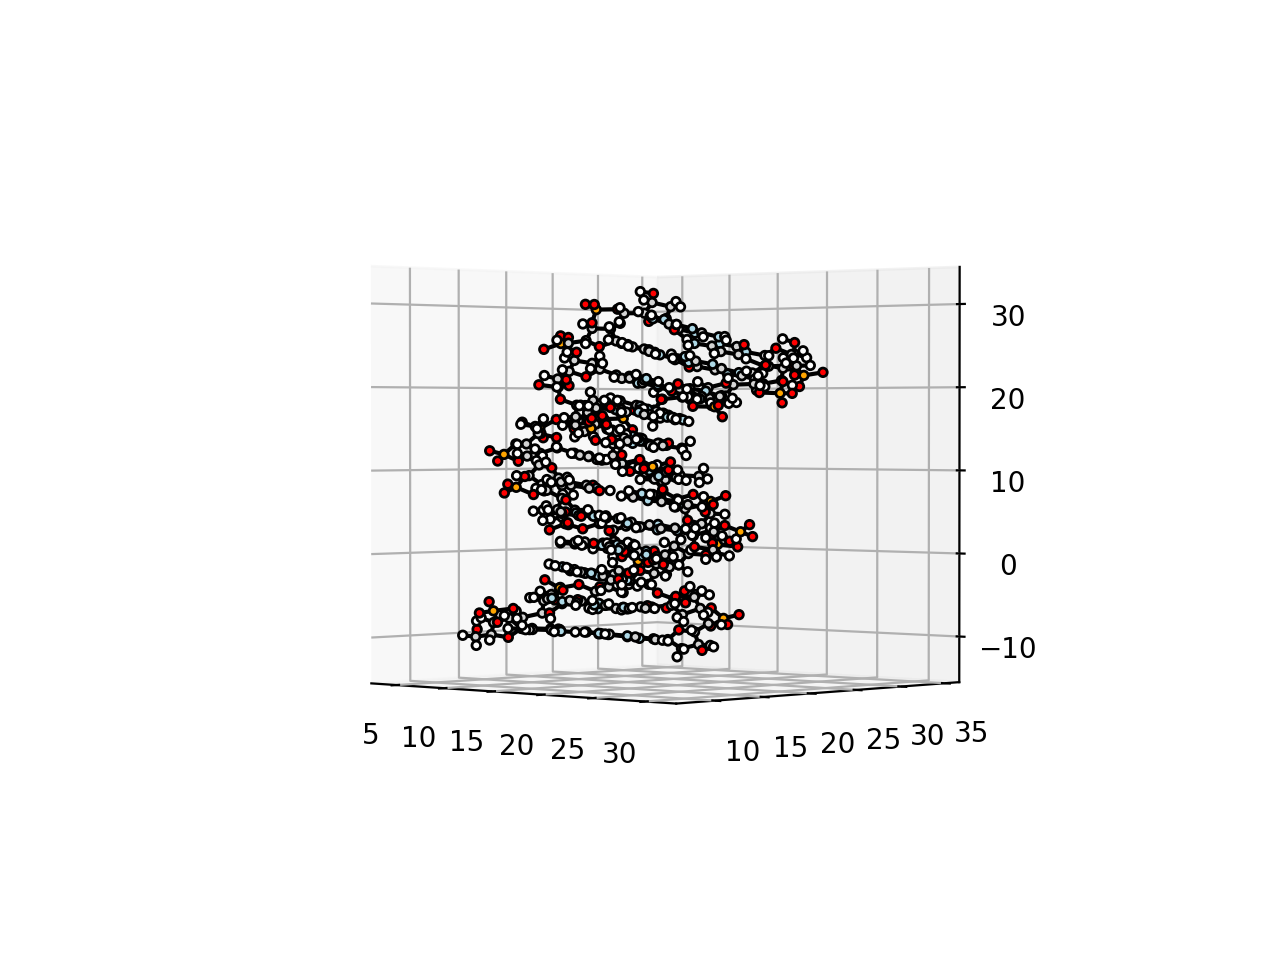

In [12]:
%matplotlib notebook
benzene_fig = draw_molecule(benzene_coords, benzene_symbols, draw_bonds=benzene_bonds)

In [13]:
plt.savefig('dna.png', dpi=300)

<IPython.core.display.Javascript object>


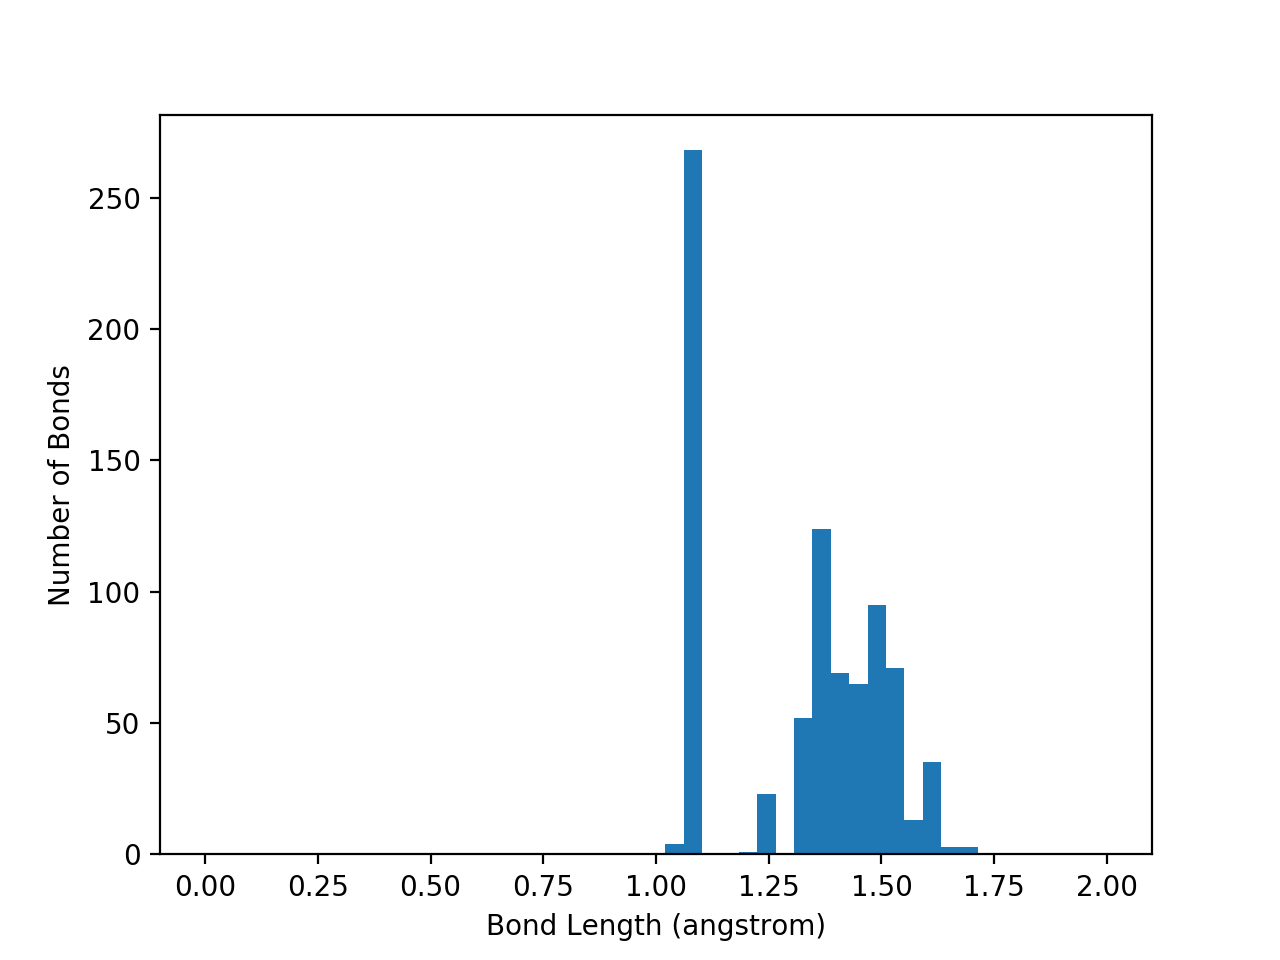

In [14]:
bond_histogram(benzene_bonds, save_location="benzene_histogram.png")